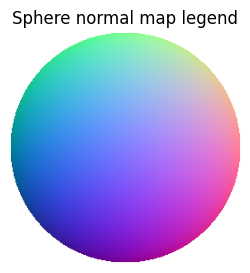

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def sphere_normal_map(size=256, flip_y=True, background=(0,0,0)):
    """
    Returns:
      rgb: (H,W,3) float in [0,1]
      mask: (H,W) boolean, True inside sphere
    """
    H = W = size
    yy, xx = np.mgrid[0:H, 0:W]
    x = (xx - (W-1)/2) / ((W-1)/2)  # [-1,1]
    y = (yy - (H-1)/2) / ((H-1)/2)  # [-1,1]
    if flip_y:
        y = -y  # image coords (down) -> (up)

    r2 = x**2 + y**2
    mask = r2 <= 1.0
    z = np.zeros_like(x)
    z[mask] = np.sqrt(1.0 - r2[mask])  # hemisphere facing viewer

    n = np.stack([x, y, z], axis=-1)
    n_norm = np.linalg.norm(n, axis=-1, keepdims=True)
    n = np.divide(n, n_norm, out=np.zeros_like(n), where=(n_norm > 0))

    rgb = 0.5 * (n + 1.0)  # map [-1,1] -> [0,1]

    # background outside sphere
    bg = np.array(background, dtype=float).reshape(1,1,3)
    rgb = np.where(mask[..., None], rgb, bg)

    return rgb, mask

# Example usage: show the legend image
rgb, mask = sphere_normal_map(size=256, flip_y=True, background=(1,1,1))
plt.figure(figsize=(3,3))
plt.imshow(rgb)
plt.axis("off")
plt.title("Sphere normal map legend")
plt.show()